# Clustering Footballers with KMeans

In this notebook I have implemented a quick and easy to use KMeans algorithm to cluster football players based on the given features outlined in the data.

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gathering the Data

In [4]:
df = pd.read_csv('CompleteDataset.csv')
df

C:\Users\original\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [5]:
sample=df.iloc[0]


In [6]:
for i in sample:
    print(i)

0
Cristiano Ronaldo
32
https://cdn.sofifa.org/48/18/players/20801.png
Portugal
https://cdn.sofifa.org/flags/38.png
94
94
Real Madrid CF
https://cdn.sofifa.org/24/18/teams/243.png
€95.5M
€565K
2228
89
63
89
63
93
95
85
81
91
94
76
7
11
15
14
11
88
29
95
77
92
22
85
95
96
83
94
23
91
92
31
80
85
88
89.0
53.0
62.0
91.0
82.0
20801
89.0
61.0
53.0
82.0
62.0
91.0
89.0
92.0
91.0
66.0
ST LW 
89.0
61.0
53.0
82.0
62.0
91.0
89.0
92.0
91.0
66.0
92.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [8]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [10]:
# # Dropping an unnecessary feature.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# Checking for missing values.
df.isnull().sum()

Name              0
Age               0
Photo             0
Nationality       0
Flag              0
               ... 
RM             2029
RS             2029
RW             2029
RWB            2029
ST             2029
Length: 74, dtype: int64

In [12]:
# Replacing the missing values.
df['Club'].fillna('N/A', inplace = True)
# df['Positioning'].fillna('ST', inplace = True)
df.fillna(0, inplace = True)

In [13]:
df['Positioning'].unique()

array(['95', '93', '90', '92', '12', '91', '85', '79', '52', '84', '13',
       '86', '28', '11', '83', '89', '38', '47', '48', '56', '10', '59',
       '71', '81', '80', '75', '88', '58', '77', '87', '70', '54', '57',
       '50', '43', '78', '40', '82', '44', '66', '16', '15', '7', '24',
       '62', '60', '68', '41', '72', '61', '25', '69', '39', '45', '74',
       '76', '26', '46', '9', '32', '51', '67', '49', '35', '65', '73',
       '14', '55', '27', '80+1', '34', '33', '29', '53', '20', '30', '37',
       '21', '64', '31', '80+3', '63', '76-2', '8', '18', '42', '76+1',
       '36', '23', '17', '80+2', '19', '4', '3', '22', '72+2', '72+4',
       '5', '73-2', '75+1', '68+2', '6', '58-1', '74+1', '74+3', '56+4',
       '71-3', '57+2', '70+3', '68-1', '77+1', '72+8', '66+2', '66-2',
       '62-3', '69+2', '65+2', '63-3', '65+1', '74+2', '70+1', '58+10',
       '66+1', '68+6', '70-2', '63+4', '66-8', '61+2', '62-2', '64+1',
       '70+2', '70+9', '69-1', '68+4', '66+5', '67+4', '10-

In [14]:
df['Preferred Positions'].isnull().values.any()

False

In [15]:
df['Preferred_Positions_category']='NAN'

In [16]:
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred_Positions_category
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,NAN
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,NAN
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,NAN
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,NAN
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NAN


In [17]:
left=['LF','LW','LM','LWB','LB']
right=['RF','RW','RM','RWB','RB']
middle=['ST','CF','CAM','CM','CDM','CB']
GK=['GK']

In [18]:
result=[2,999,3,4]
index_max = np.argmax(result)
index_max
# max_value = max(result) 
# max_value.index(max_value) 

1

In [19]:
df['Preferred Positions']

0        ST LW 
1           RW 
2           LW 
3           ST 
4           GK 
          ...  
17976       GK 
17977       GK 
17978       ST 
17979       CM 
17980    ST CB 
Name: Preferred Positions, Length: 17981, dtype: object

In [20]:
for i in range(0,len(df)):
    value=df['Preferred Positions'].iloc[i].strip().split(' ')
    for j in range(0,len(value)):
        left_count=0
        right_count=0
        middle_count=0
        GK_count=0
        if value[j] in left:
            left_count+=1
            
        if value[j] in right:
            right_count+=1
            
        if value[j] in middle:
            middle_count+=1
            
        if value[j] in GK:
            GK_count+=1
        result=[left_count,right_count,middle_count,GK_count]
#         print(result)
        index_max = np.argmax(result)
        if index_max==0 :
            df['Preferred_Positions_category'].iloc[i]='Left'
        if index_max==1 :
            df['Preferred_Positions_category'].iloc[i]='right'
        if index_max==2 :
            df['Preferred_Positions_category'].iloc[i]='middle'
        if index_max==3 :
            df['Preferred_Positions_category'].iloc[i]='GK'
#     print()

C:\Users\original\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred_Positions_category
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,Left
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,right
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,Left
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,middle
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GK
17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GK
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,€60K,...,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0,middle
17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,€60K,...,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0,middle


In [22]:
df[df['Preferred_Positions_category']=='NAN']

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred_Positions_category


In [23]:
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST',
       'Preferred_Positions_category'],
      dtype='object')

In [24]:
new_data=df[['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys','Preferred_Positions_category']]

In [25]:
new_data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,83,94,23,91,92,31,80,85,88,Left
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,88,85,26,87,73,28,59,90,85,right
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,81,80,33,90,78,24,53,80,83,Left
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,83,87,38,77,89,45,80,84,88,middle
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,55,25,11,61,44,10,83,70,11,GK


In [26]:
# new_data['Positioning']

# EDA

In [27]:
# new_data['Preferred Positions'].unique()

In [28]:
# df['Preferred Positions'].unique()

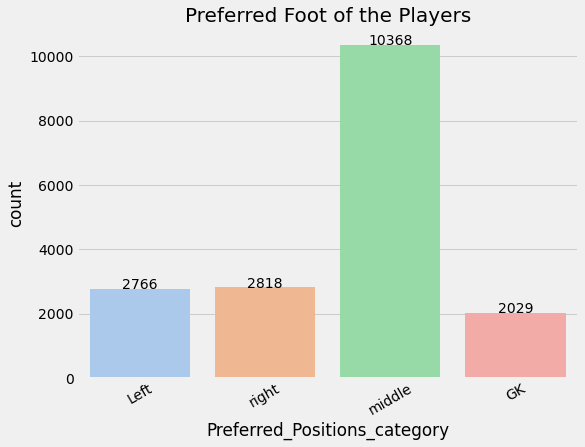

In [29]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred_Positions_category'], data=df, palette = 'pastel')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [28]:
new_data.head(15)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,83,94,23,91,92,31,80,85,88,Left
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,88,85,26,87,73,28,59,90,85,right
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,81,80,33,90,78,24,53,80,83,Left
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,83,87,38,77,89,45,80,84,88,middle
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,55,25,11,61,44,10,83,70,11,GK
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,...,83,88,19,83,79,42,84,78,87,middle
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,50,31,13,58,40,21,64,68,13,GK
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,...,86,79,22,87,79,27,65,86,79,Left
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€79M,...,90,87,69,52,77,82,74,88,82,middle
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,...,75,88,18,80,72,22,85,70,88,middle


In [29]:
left=['LF','LW','LM','LWB','LB']
right=['RF','RW','RM','RWB','RB']
middle=['ST','CF','CAM','CM','CDM','CB']
GK=['GK']

In [30]:
new_data['Preferred_Position_Final']=df['Preferred Positions']
for i in range(0,len(new_data)):
    value=new_data['Preferred_Position_Final'].iloc[i].strip().split(' ')
#     print(value)
    if new_data['Preferred_Positions_category'].iloc[i]=='Left':
        for j in range(0,len(value)):
#             print(j)
            if value[j] in left:
                new_data['Preferred_Position_Final'].iloc[i]=value[j]
                break
            
    if new_data['Preferred_Positions_category'].iloc[i]=='right':
        for j in range(0,len(value)):
            if value[j]  in right:
                new_data['Preferred_Position_Final'].iloc[i]=value[j]
                break
                
#         new_data['Preferred_Position_Final'].iloc[i]=value

            
    if new_data['Preferred_Positions_category'].iloc[i]=='middle':
        for j in range(0,len(value)):
            if value[j]  in middle:
                new_data['Preferred_Position_Final'].iloc[i]=value[j]
                break

            
    if new_data['Preferred_Positions_category'].iloc[i]=='GK':
        for j in range(0,len(value)):
            if value[j]  in GK:
                new_data['Preferred_Position_Final'].iloc[i]=value[j]
                break                


C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/1272023176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Preferred_Position_Final']=df['Preferred Positions']
C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
new_data

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category,Preferred_Position_Final
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,94,23,91,92,31,80,85,88,Left,LW
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,85,26,87,73,28,59,90,85,right,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,80,33,90,78,24,53,80,83,Left,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,87,38,77,89,45,80,84,88,middle,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,25,11,61,44,10,83,70,11,GK,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,...,19,10,32,28,11,50,26,6,GK,GK
17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,...,13,13,25,32,12,47,17,12,GK,GK
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,€60K,...,42,14,51,33,17,32,37,33,middle,ST
17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,€60K,...,43,47,58,49,48,46,51,25,middle,CM


In [32]:
for i in range(0,len(new_data)):
        if len(new_data['Preferred_Position_Final'].iloc[i])>1:
            print('yes')
#         print(()

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


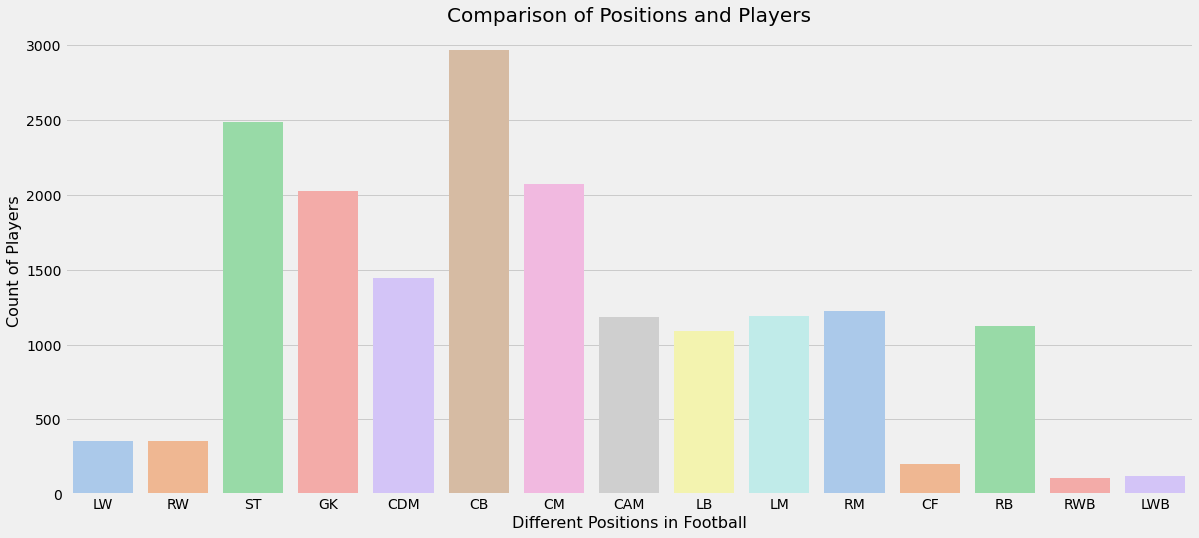

In [33]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Preferred_Position_Final', data = new_data, palette = 'pastel')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [34]:
new_data.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'Preferred_Positions_category', 'Preferred_Position_Final'],
      dtype='object')

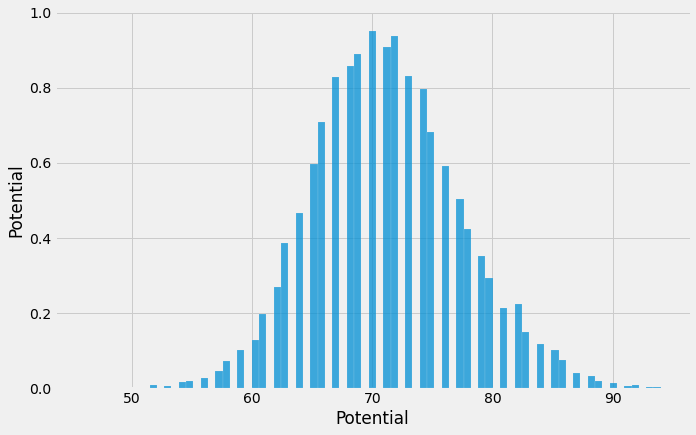

In [35]:
g = sns.pairplot(new_data[['Value','Sprint speed','Potential','Wage']])
g.fig.set_size_inches(15,8)


In [36]:
95500000
95500000

105000000
10500000

10500000

In [37]:
type(new_data['Value'])

pandas.core.series.Series

In [38]:
new_data['Value_Mill_or_K']=1

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/844274111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Value_Mill_or_K']=1


In [39]:
new_data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category,Preferred_Position_Final,Value_Mill_or_K
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,23,91,92,31,80,85,88,Left,LW,1
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,26,87,73,28,59,90,85,right,RW,1
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,33,90,78,24,53,80,83,Left,LW,1
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,38,77,89,45,80,84,88,middle,ST,1
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,11,61,44,10,83,70,11,GK,GK,1


In [40]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          17981 non-null  object
 1   Age                           17981 non-null  int64 
 2   Photo                         17981 non-null  object
 3   Nationality                   17981 non-null  object
 4   Flag                          17981 non-null  object
 5   Overall                       17981 non-null  int64 
 6   Potential                     17981 non-null  int64 
 7   Club                          17981 non-null  object
 8   Club Logo                     17981 non-null  object
 9   Value                         17981 non-null  object
 10  Wage                          17981 non-null  object
 11  Special                       17981 non-null  int64 
 12  Acceleration                  17981 non-null  object
 13  Aggression      

In [41]:
for i in range(0,len((new_data))):
    value=new_data['Value'].iloc[i].replace('€','').strip()
#     print(value)
    if 'M' in value:
        new_data['Value_Mill_or_K'].iloc[i]=100000
    if 'K' in value:
        new_data['Value_Mill_or_K'].iloc[i]=1000
        

C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
new_data[['Value_Mill_or_K','Value']]

,Value_Mill_or_K,Value
0,100000,€95.5M
1,100000,€105M
2,100000,€123M
3,100000,€97M
4,100000,€61M
...,...,...
17976,1000,€50K
17977,1,€0
17978,1000,€60K
17979,1000,€60K


In [43]:
for i in range(0,len((new_data))):
    new_data['Value'].iloc[i]=new_data['Value'].iloc[i].replace('€','').strip('M').strip('K').strip()
#     print(value)
new_data['Value']=pd.to_numeric(new_data['Value'])

C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/784793726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Value']=pd.to_numeric(new_data['Value'])


In [44]:
new_data[['Value_Mill_or_K','Value']]

,Value_Mill_or_K,Value
0,100000,95.5
1,100000,105.0
2,100000,123.0
3,100000,97.0
4,100000,61.0
...,...,...
17976,1000,50.0
17977,1,0.0
17978,1000,60.0
17979,1000,60.0


In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          17981 non-null  object 
 1   Age                           17981 non-null  int64  
 2   Photo                         17981 non-null  object 
 3   Nationality                   17981 non-null  object 
 4   Flag                          17981 non-null  object 
 5   Overall                       17981 non-null  int64  
 6   Potential                     17981 non-null  int64  
 7   Club                          17981 non-null  object 
 8   Club Logo                     17981 non-null  object 
 9   Value                         17981 non-null  float64
 10  Wage                          17981 non-null  object 
 11  Special                       17981 non-null  int64  
 12  Acceleration                  17981 non-null  object 
 13  A

In [46]:
new_data['Final_value']=new_data['Value_Mill_or_K']*new_data['Value']

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/2838381920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Final_value']=new_data['Value_Mill_or_K']*new_data['Value']


In [47]:
new_data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category,Preferred_Position_Final,Value_Mill_or_K,Final_value
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,91,92,31,80,85,88,Left,LW,100000,9550000.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,87,73,28,59,90,85,right,RW,100000,10500000.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,90,78,24,53,80,83,Left,LW,100000,12300000.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,77,89,45,80,84,88,middle,ST,100000,9700000.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,...,61,44,10,83,70,11,GK,GK,100000,6100000.0


In [48]:
new_data[['Final_value','Sprint speed','Potential','Wage']]

,Final_value,Sprint speed,Potential,Wage
0,9550000.0,91,94,€565K
1,10500000.0,87,93,€565K
2,12300000.0,90,94,€280K
3,9700000.0,77,92,€510K
4,6100000.0,61,92,€230K
...,...,...,...,...
17976,50000.0,32,63,€1K
17977,0.0,25,46,€1K
17978,60000.0,51,61,€1K
17979,60000.0,58,64,€1K


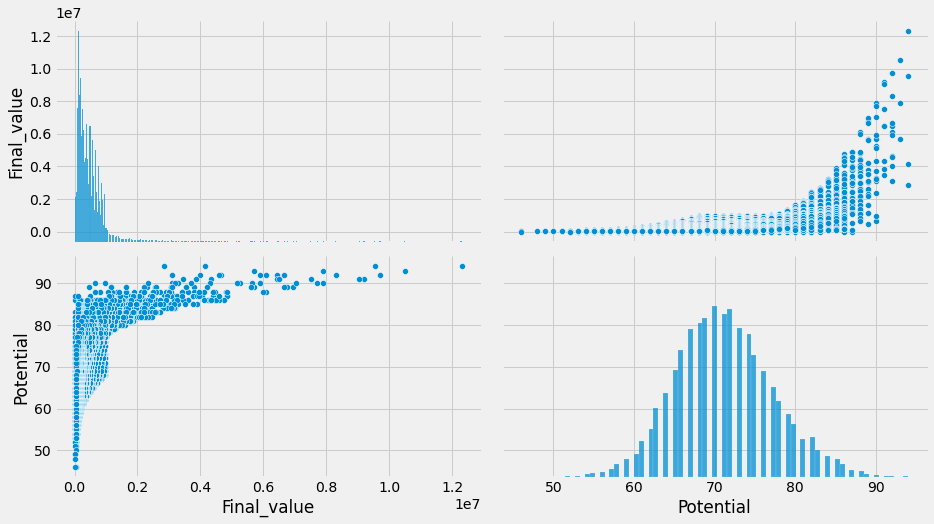

In [49]:
g = sns.pairplot(new_data[['Final_value','Sprint speed','Potential','Wage']])
g.fig.set_size_inches(15,8)


In [50]:
new_data['Wage_Mill_or_K']=1

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/2196925156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Wage_Mill_or_K']=1


In [51]:
for i in range(0,len(new_data)):
    print(new_data['Wage'].iloc[i])

€565K
€565K
€280K
€510K
€230K
€355K
€215K
€295K
€340K
€275K
€310K
€285K
€190K
€265K
€340K
€370K
€325K
€225K
€110K
€215K
€82K
€150K
€225K
€165K
€210K
€215K
€125K
€215K
€265K
€165K
€175K
€240K
€225K
€190K
€130K
€195K
€165K
€160K
€160K
€250K
€130K
€275K
€220K
€91K
€240K
€260K
€165K
€250K
€250K
€150K
€210K
€175K
€190K
€250K
€205K
€120K
€165K
€190K
€235K
€130K
€165K
€135K
€110K
€115K
€295K
€210K
€175K
€94K
€92K
€77K
€175K
€195K
€115K
€180K
€165K
€195K
€46K
€61K
€155K
€60K
€215K
€190K
€160K
€145K
€160K
€160K
€130K
€145K
€49K
€81K
€170K
€105K
€150K
€175K
€165K
€36K
€115K
€175K
€195K
€120K
€105K
€170K
€96K
€39K
€84K
€96K
€145K
€190K
€105K
€200K
€69K
€59K
€110K
€115K
€200K
€160K
€54K
€46K
€195K
€145K
€60K
€68K
€150K
€160K
€115K
€60K
€38K
€31K
€150K
€68K
€53K
€28K
€37K
€70K
€78K
€87K
€37K
€135K
€58K
€75K
€75K
€21K
€135K
€88K
€89K
€135K
€18K
€68K
€60K
€56K
€28K
€110K
€115K
€39K
€140K
€140K
€100K
€45K
€75K
€115K
€28K
€130K
€0
€25K
€105K
€66K
€87K
€0
€15K
€70K
€135K
€135K
€50K
€27K
€19K
€39K
€115K


€63K
€18K
€45K
€19K
€13K
€36K
€21K
€36K
€7K
€51K
€42K
€14K
€17K
€38K
€18K
€4K
€15K
€13K
€28K
€21K
€16K
€46K
€12K
€21K
€12K
€58K
€23K
€35K
€37K
€5K
€15K
€18K
€13K
€8K
€8K
€20K
€9K
€0
€38K
€17K
€35K
€22K
€20K
€9K
€14K
€12K
€10K
€8K
€19K
€36K
€10K
€11K
€3K
€11K
€19K
€31K
€3K
€0
€17K
€8K
€14K
€27K
€17K
€40K
€45K
€13K
€0
€20K
€29K
€1K
€0
€6K
€29K
€14K
€6K
€71K
€21K
€13K
€25K
€48K
€20K
€19K
€27K
€19K
€16K
€0
€3K
€58K
€15K
€20K
€12K
€1K
€25K
€34K
€37K
€28K
€24K
€19K
€17K
€29K
€55K
€7K
€33K
€28K
€21K
€26K
€13K
€20K
€32K
€42K
€42K
€10K
€45K
€18K
€10K
€53K
€29K
€76K
€24K
€44K
€15K
€44K
€20K
€10K
€7K
€40K
€13K
€8K
€9K
€11K
€33K
€10K
€40K
€6K
€26K
€5K
€16K
€5K
€7K
€15K
€12K
€13K
€47K
€29K
€4K
€12K
€17K
€11K
€1K
€8K
€51K
€0
€5K
€23K
€1K
€6K
€14K
€6K
€38K
€42K
€43K
€19K
€38K
€18K
€4K
€13K
€19K
€17K
€37K
€56K
€9K
€4K
€18K
€36K
€31K
€37K
€9K
€5K
€8K
€30K
€27K
€5K
€23K
€11K
€10K
€19K
€27K
€1K
€12K
€56K
€9K
€10K
€18K
€18K
€18K
€17K
€8K
€11K
€56K
€53K
€31K
€18K
€16K
€13K
€6K
€17K
€28K
€13K
€20K
€15K
€1K


€0
€1K
€3K
€12K
€5K
€5K
€17K
€21K
€13K
€12K
€51K
€7K
€44K
€12K
€13K
€7K
€11K
€11K
€6K
€21K
€19K
€8K
€10K
€3K
€20K
€10K
€3K
€10K
€7K
€12K
€5K
€15K
€6K
€0
€23K
€10K
€8K
€4K
€9K
€22K
€15K
€4K
€14K
€3K
€15K
€7K
€4K
€15K
€12K
€7K
€29K
€5K
€21K
€23K
€4K
€5K
€7K
€10K
€18K
€32K
€6K
€14K
€26K
€21K
€5K
€8K
€8K
€10K
€4K
€7K
€9K
€31K
€40K
€13K
€15K
€13K
€12K
€12K
€11K
€12K
€35K
€19K
€23K
€8K
€17K
€6K
€16K
€6K
€8K
€16K
€6K
€32K
€13K
€12K
€6K
€11K
€15K
€4K
€5K
€6K
€8K
€17K
€10K
€7K
€4K
€7K
€4K
€8K
€14K
€26K
€15K
€7K
€2K
€6K
€1K
€9K
€14K
€12K
€9K
€25K
€5K
€6K
€32K
€4K
€6K
€20K
€7K
€21K
€1K
€30K
€11K
€6K
€17K
€16K
€9K
€6K
€21K
€29K
€18K
€6K
€4K
€8K
€6K
€6K
€14K
€7K
€6K
€17K
€8K
€9K
€6K
€10K
€7K
€5K
€14K
€3K
€5K
€25K
€26K
€2K
€17K
€9K
€12K
€6K
€18K
€8K
€4K
€4K
€11K
€3K
€20K
€8K
€0
€0
€14K
€28K
€0
€23K
€20K
€8K
€30K
€4K
€8K
€24K
€7K
€5K
€6K
€7K
€14K
€1K
€11K
€21K
€23K
€6K
€22K
€1K
€1K
€8K
€7K
€15K
€13K
€0
€13K
€35K
€3K
€8K
€2K
€6K
€7K
€5K
€16K
€12K
€10K
€24K
€6K
€28K
€5K
€14K
€5K
€14K
€6K
€8K
€0
€3K
€6K

€3K
€4K
€3K
€1K
€3K
€3K
€13K
€9K
€9K
€6K
€1K
€3K
€14K
€1K
€4K
€1K
€9K
€0
€2K
€8K
€5K
€6K
€3K
€17K
€11K
€12K
€10K
€13K
€6K
€20K
€5K
€4K
€3K
€12K
€4K
€0
€1K
€8K
€3K
€0
€26K
€7K
€5K
€3K
€7K
€5K
€9K
€4K
€6K
€2K
€9K
€8K
€7K
€10K
€1K
€5K
€8K
€4K
€5K
€8K
€4K
€8K
€1K
€3K
€28K
€5K
€5K
€9K
€14K
€6K
€10K
€9K
€7K
€20K
€6K
€7K
€3K
€9K
€8K
€5K
€6K
€9K
€12K
€5K
€3K
€11K
€10K
€6K
€10K
€5K
€7K
€4K
€3K
€6K
€20K
€15K
€7K
€9K
€5K
€8K
€4K
€3K
€4K
€14K
€11K
€13K
€5K
€5K
€5K
€16K
€7K
€6K
€11K
€3K
€5K
€7K
€13K
€2K
€3K
€5K
€19K
€5K
€10K
€1K
€5K
€17K
€6K
€3K
€19K
€22K
€13K
€5K
€5K
€3K
€6K
€15K
€5K
€6K
€4K
€5K
€3K
€8K
€4K
€37K
€37K
€6K
€4K
€4K
€3K
€18K
€2K
€8K
€4K
€13K
€0
€9K
€18K
€6K
€6K
€5K
€7K
€5K
€0
€4K
€8K
€3K
€15K
€5K
€5K
€4K
€4K
€30K
€3K
€11K
€7K
€4K
€4K
€3K
€15K
€3K
€3K
€4K
€4K
€7K
€8K
€11K
€9K
€23K
€5K
€3K
€11K
€6K
€9K
€8K
€4K
€12K
€5K
€7K
€5K
€6K
€6K
€4K
€8K
€10K
€2K
€9K
€6K
€3K
€10K
€7K
€1K
€5K
€5K
€3K
€11K
€6K
€1K
€1K
€8K
€10K
€9K
€19K
€4K
€3K
€7K
€4K
€10K
€1K
€10K
€14K
€26K
€7K
€11K
€7K
€3K
€4K
€13K

€3K
€1K
€4K
€3K
€2K
€2K
€2K
€1K
€2K
€2K
€2K
€3K
€7K
€8K
€4K
€1K
€4K
€2K
€6K
€2K
€2K
€2K
€7K
€1K
€10K
€3K
€1K
€2K
€2K
€4K
€0
€2K
€1K
€1K
€3K
€0
€2K
€4K
€3K
€2K
€2K
€4K
€4K
€5K
€2K
€3K
€5K
€4K
€3K
€12K
€4K
€2K
€2K
€3K
€3K
€2K
€5K
€2K
€11K
€6K
€2K
€2K
€7K
€2K
€4K
€5K
€10K
€3K
€4K
€3K
€2K
€2K
€6K
€3K
€8K
€0
€5K
€2K
€7K
€2K
€2K
€2K
€3K
€1K
€3K
€1K
€3K
€3K
€4K
€1K
€3K
€5K
€1K
€2K
€1K
€6K
€9K
€2K
€2K
€5K
€4K
€1K
€3K
€18K
€4K
€1K
€8K
€1K
€12K
€13K
€2K
€4K
€5K
€3K
€1K
€3K
€8K
€1K
€1K
€5K
€2K
€3K
€1K
€2K
€4K
€4K
€3K
€2K
€3K
€4K
€2K
€0
€1K
€2K
€1K
€1K
€1K
€3K
€4K
€7K
€2K
€3K
€4K
€4K
€1K
€4K
€1K
€2K
€2K
€6K
€3K
€2K
€5K
€3K
€23K
€2K
€3K
€1K
€1K
€1K
€6K
€2K
€2K
€9K
€2K
€4K
€1K
€4K
€1K
€2K
€1K
€1K
€1K
€2K
€3K
€3K
€2K
€4K
€2K
€2K
€2K
€4K
€2K
€1K
€2K
€1K
€1K
€2K
€3K
€4K
€2K
€1K
€1K
€5K
€1K
€1K
€2K
€3K
€1K
€3K
€2K
€5K
€8K
€1K
€3K
€1K
€11K
€1K
€3K
€2K
€6K
€10K
€2K
€7K
€1K
€3K
€3K
€2K
€8K
€1K
€1K
€3K
€11K
€2K
€1K
€5K
€2K
€1K
€3K
€1K
€8K
€1K
€2K
€2K
€1K
€2K
€3K
€2K
€1K
€3K
€2K
€5K
€1K
€1K
€1K
€2K
€0
€6K
€2

€3K
€2K
€4K
€2K
€1K
€2K
€1K
€4K
€3K
€7K
€1K
€2K
€2K
€4K
€4K
€3K
€2K
€2K
€0
€1K
€3K
€1K
€1K
€3K
€5K
€2K
€2K
€5K
€9K
€1K
€2K
€1K
€3K
€4K
€2K
€1K
€1K
€1K
€2K
€1K
€2K
€2K
€2K
€1K
€3K
€1K
€1K
€2K
€1K
€4K
€4K
€2K
€2K
€2K
€2K
€1K
€3K
€2K
€6K
€2K
€2K
€1K
€5K
€3K
€1K
€3K
€3K
€4K
€4K
€2K
€3K
€3K
€1K
€4K
€2K
€1K
€3K
€3K
€2K
€1K
€2K
€3K
€2K
€2K
€3K
€1K
€7K
€1K
€2K
€1K
€2K
€2K
€4K
€2K
€1K
€1K
€3K
€1K
€6K
€1K
€2K
€2K
€4K
€5K
€2K
€1K
€6K
€1K
€12K
€1K
€2K
€4K
€1K
€0
€1K
€2K
€1K
€3K
€1K
€1K
€2K
€2K
€1K
€14K
€3K
€3K
€7K
€1K
€2K
€2K
€2K
€2K
€9K
€1K
€2K
€2K
€1K
€4K
€2K
€3K
€2K
€6K
€5K
€6K
€1K
€1K
€1K
€8K
€2K
€1K
€5K
€1K
€2K
€2K
€1K
€1K
€5K
€2K
€1K
€1K
€1K
€1K
€2K
€3K
€1K
€6K
€3K
€3K
€2K
€2K
€2K
€1K
€2K
€4K
€6K
€1K
€1K
€7K
€2K
€2K
€1K
€2K
€3K
€1K
€2K
€2K
€4K
€2K
€6K
€1K
€3K
€2K
€1K
€1K
€2K
€1K
€3K
€3K
€3K
€2K
€1K
€4K
€1K
€1K
€1K
€1K
€1K
€2K
€3K
€1K
€2K
€4K
€2K
€1K
€3K
€1K
€1K
€2K
€2K
€3K
€3K
€6K
€2K
€2K
€4K
€2K
€1K
€1K
€3K
€2K
€2K
€6K
€1K
€1K
€5K
€1K
€3K
€1K
€5K
€2K
€6K
€1K
€1K
€9K
€1K
€2K
€1K
€4K
€2K
€1K


€1K
€3K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€2K
€1K
€1K
€2K
€1K
€1K
€1K
€3K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€3K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€4K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€6K
€2K
€2K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€2K
€2K
€1K
€1K
€2K
€1K
€1K
€2K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€0
€1K
€1K
€0
€1K
€3K
€1K
€1K
€1K
€2K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€0
€1K
€2K
€5K
€1K
€1K
€2K
€1K
€1K
€2K
€2K
€1K
€1K
€1K
€3K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€3K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€2K
€1K
€1K
€1K
€1K
€0
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€4K
€1K
€1K
€1K
€1K
€1K
€2K
€1K
€1K
€1K
€1K
€1K
€1K


In [52]:
for i in range(0,len((new_data))):
    value=new_data['Wage'].iloc[i].replace('€','').strip()
#     print(value)
    if 'M' in value:
        new_data['Wage_Mill_or_K'].iloc[i]=100000
    if 'K' in value:
        new_data['Wage_Mill_or_K'].iloc[i]=1000
        

C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
new_data['Wage_Mill_or_K']

0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
17976    1000
17977    1000
17978    1000
17979    1000
17980    1000
Name: Wage_Mill_or_K, Length: 17981, dtype: int64

In [54]:
for i in range(0,len((new_data))):
    new_data['Wage'].iloc[i]=new_data['Wage'].iloc[i].replace('€','').strip('M').strip('K').strip()
#     print(value)
new_data['Wage']=pd.to_numeric(new_data['Wage'])

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/3842255039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Wage']=pd.to_numeric(new_data['Wage'])


In [55]:
new_data['Final_Wage']=new_data['Wage_Mill_or_K']*new_data['Wage']

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/2671178153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Final_Wage']=new_data['Wage_Mill_or_K']*new_data['Wage']


In [56]:
new_data[['Final_value','Sprint speed','Potential','Final_Wage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Final_value   17981 non-null  float64
 1   Sprint speed  17981 non-null  object 
 2   Potential     17981 non-null  int64  
 3   Final_Wage    17981 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 562.0+ KB


In [57]:
new_data['Sprint speed']=df['Sprint speed']

C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/45331482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Sprint speed']=df['Sprint speed']


In [58]:
for i in range(0,len((new_data))):
    value=(new_data['Sprint speed'].iloc[i])
    if '+'  in value:
        value=value.split('+')
        new_data['Sprint speed'].iloc[i]=int(value[0])+int(value[1])
        
        
    if '-'  in value:
        new_data['Sprint speed'].iloc[i]=int(value[0])-int(value[1])

In [59]:
# for i in range(0,len((new_data))):
#     value=(new_data['Sprint speed'].iloc[i]) 
#     print(value)


In [60]:
new_data['Sprint speed']=pd.to_numeric(new_data['Sprint speed'])


C:\Users\ELHAJA~1\AppData\Local\Temp/ipykernel_16236/2838065146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Sprint speed']=pd.to_numeric(new_data['Sprint speed'])


In [61]:
new_data[['Final_value','Sprint speed','Potential','Final_Wage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Final_value   17981 non-null  float64
 1   Sprint speed  17981 non-null  int64  
 2   Potential     17981 non-null  int64  
 3   Final_Wage    17981 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 562.0 KB


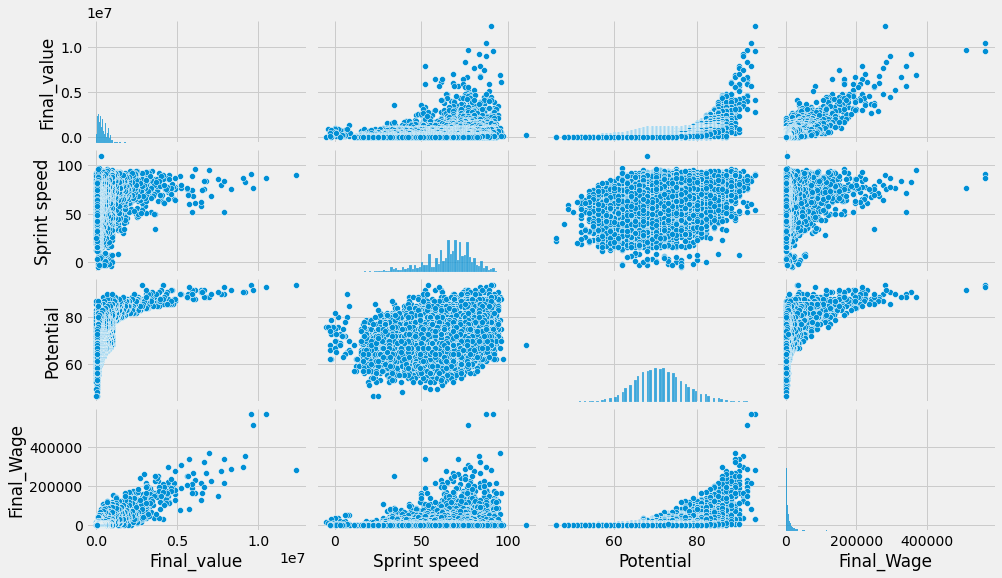

In [62]:
g = sns.pairplot(new_data[['Final_value','Sprint speed','Potential','Final_Wage']])
g.fig.set_size_inches(15,8)


In [63]:
# Creating a dataframe consisting of players from certain teams and nationalities. 
filtered_player_df = new_data[(new_data['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (new_data['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]

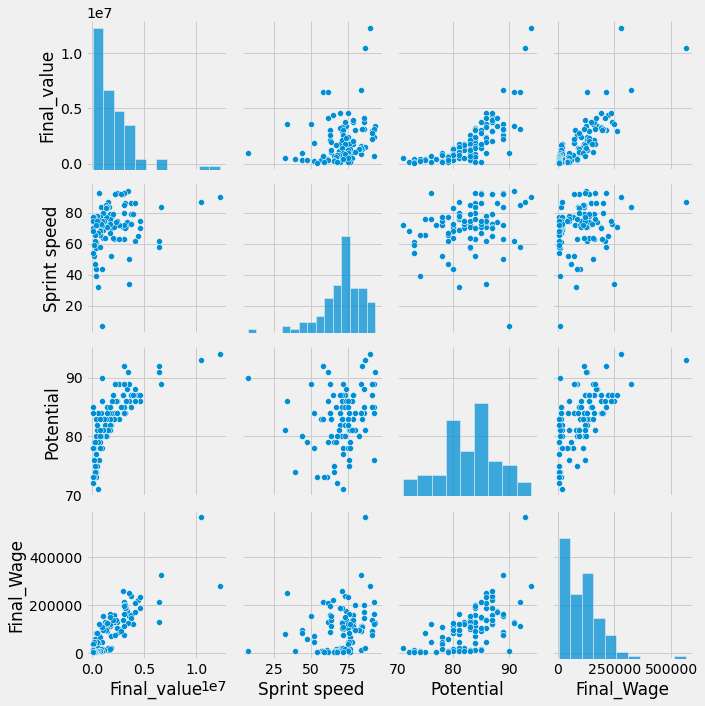

In [64]:
g = sns.pairplot(filtered_player_df[['Final_value','Sprint speed','Potential','Final_Wage']])

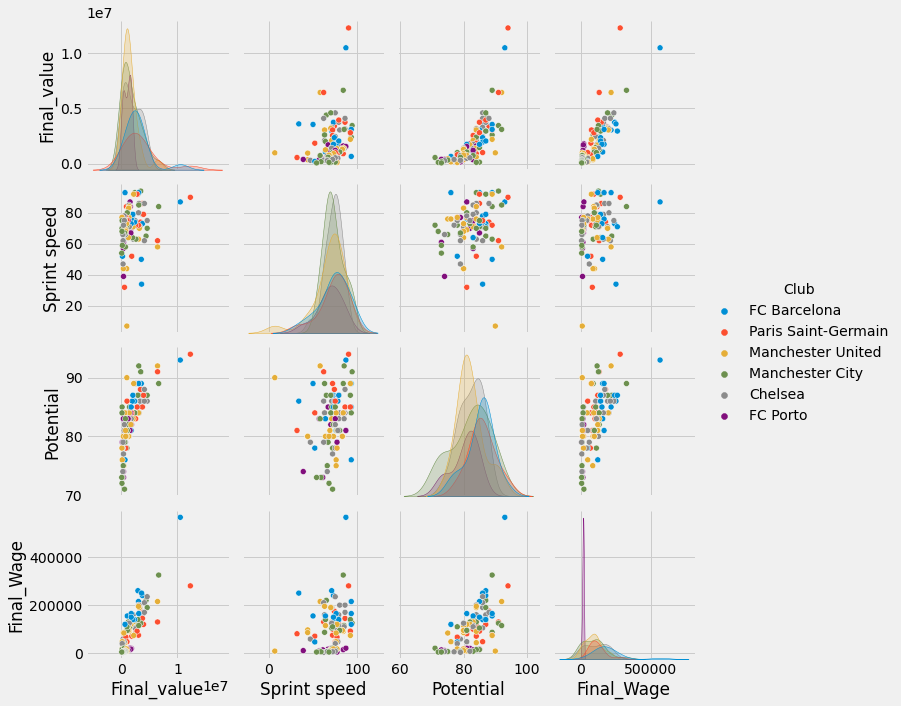

In [65]:
g = sns.pairplot(filtered_player_df[['Final_value','Sprint speed','Potential','Final_Wage','Club']],hue = 'Club')


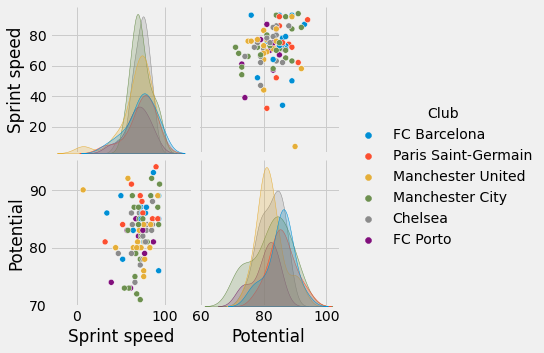

In [66]:
g = sns.pairplot(filtered_player_df[['Sprint speed','Potential','Club']],hue = 'Club')


In [67]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          17981 non-null  object 
 1   Age                           17981 non-null  int64  
 2   Photo                         17981 non-null  object 
 3   Nationality                   17981 non-null  object 
 4   Flag                          17981 non-null  object 
 5   Overall                       17981 non-null  int64  
 6   Potential                     17981 non-null  int64  
 7   Club                          17981 non-null  object 
 8   Club Logo                     17981 non-null  object 
 9   Value                         17981 non-null  float64
 10  Wage                          17981 non-null  int64  
 11  Special                       17981 non-null  int64  
 12  Acceleration                  17981 non-null  object 
 13  A

In [111]:
new_data_2=new_data.copy()

In [112]:
new_data_2

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Standing tackle,Strength,Vision,Volleys,Preferred_Positions_category,Preferred_Position_Final,Value_Mill_or_K,Final_value,Wage_Mill_or_K,Final_Wage
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,31,80,85,88,Left,LW,100000,9550000.0,1000,565000
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,28,59,90,85,right,RW,100000,10500000.0,1000,565000
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,24,53,80,83,Left,LW,100000,12300000.0,1000,280000
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,45,80,84,88,middle,ST,100000,9700000.0,1000,510000
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,...,10,83,70,11,GK,GK,100000,6100000.0,1000,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50.0,...,11,50,26,6,GK,GK,1000,50000.0,1000,1000
17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,0.0,...,12,47,17,12,GK,GK,1,0.0,1000,1000
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,60.0,...,17,32,37,33,middle,ST,1000,60000.0,1000,1000
17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,60.0,...,48,46,51,25,middle,CM,1000,60000.0,1000,1000


In [113]:
new_data_2.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'Preferred_Positions_category', 'Preferred_Position_Final',
       'Value_Mill_or_K', 'Final_value', 'Wage_Mill_or_K', 'Final_Wage'],
      dtype='object')

In [115]:
df2.columns

Index(['Age', 'Overall', 'Potential', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'Final_value', 'Final_Wage'],
      dtype='object')

In [121]:

# Getting rid of non-integer features.
new_data_2=new_data.copy()
df2 = new_data_2.drop(columns=['Name', 'Photo', 'Nationality', 'Flag', 'Club','Club Logo','Value','Preferred_Positions_category','Preferred_Position_Final','Value_Mill_or_K','Wage_Mill_or_K'])

df2['Acceleration_Edited']=0
for i in range(0,len(df2['Acceleration'])):
    result_no=0
    if '+' in df2['Acceleration'].iloc[i]:
        value=df2['Acceleration'].iloc[i].split('+')
        print(value)
        for no in value:
            result_no+=int(no)
        df2['Acceleration_Edited'].iloc[i]=result_no
        print ('Pluse_case',df2['Acceleration_Edited'].iloc[i])
        
#     if '-' in df2['Acceleration'].iloc[i]:
#         value=df2['Acceleration'].iloc[i].split('-')
#         for no in value:
#             result_no-=int(no)
#             df2['Acceleration_Edited'].iloc[i]=result_no
#         print ('Mines_case',df2['Acceleration_Edited'].iloc[i])
#     else:
#         df2['Acceleration_Edited'].iloc[i]=int(df2['Acceleration'].iloc[i])
#         print(df2['Acceleration_Edited'].iloc[i])

['70', '9']
Pluse_case 79
['80', '1']
Pluse_case 81
['67', '2']
Pluse_case 69
['75', '1']
Pluse_case 76
['74', '1']
Pluse_case 75
['70', '3']
Pluse_case 73
['75', '5']
Pluse_case 80
['74', '2']
Pluse_case 76
['71', '2']
Pluse_case 73
['68', '1']
Pluse_case 69
['80', '1']
Pluse_case 81
['71', '4']
Pluse_case 75
['78', '1']
Pluse_case 79
['86', '1']
Pluse_case 87
['66', '1']
Pluse_case 67
['74', '4']
Pluse_case 78
['80', '2']
Pluse_case 82
['70', '3']
Pluse_case 73
['78', '3']
Pluse_case 81
['66', '1']
Pluse_case 67
['73', '9']
Pluse_case 82
['68', '3']
Pluse_case 71
['68', '2']
Pluse_case 70
['77', '3']
Pluse_case 80
['82', '10']
Pluse_case 92
['70', '3']
Pluse_case 73
['72', '1']
Pluse_case 73
['61', '1']
Pluse_case 62
['79', '8']
Pluse_case 87
['86', '7']
Pluse_case 93
['81', '4']
Pluse_case 85
['69', '3']
Pluse_case 72
['78', '1']
Pluse_case 79
['73', '4']
Pluse_case 77
['64', '5']
Pluse_case 69
['33', '10']
Pluse_case 43
['92', '2']
Pluse_case 94
['62', '2']
Pluse_case 64
['65', '7'

C:\Users\ElhajAbdouM\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [122]:
df2[['Acceleration_Edited','Acceleration']]

,Acceleration_Edited,Acceleration
0,0,89
1,0,92
2,0,94
3,0,88
4,0,58
...,...,...
17976,0,24
17977,0,25
17978,0,66
17979,0,57


In [1]:
# for i in range(0,len(df2.columns)):
#     print(df2.columns[i])
#     df2[df2.columns[i]]= pd.to_numeric(df2[df2.columns[i]])

In [81]:
df2.dtypes

Age                     int64
Overall                 int64
Potential               int64
Wage                    int64
Special                 int64
Aggression             object
Agility                object
Balance                object
Ball control           object
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short passing          object
Shot power             object
Sliding tackle         object
Sprint speed            int64
Stamina   

# 2D PCA

Principal Component Analysis was performed in order to reduce the dimensionality of the data. Since the data has 42 features it was decided to use PCA to reduce them to just 2 principal features. 2D and 3D PCA were both implemented - the difference being in the number of principal features attained.

In [20]:
X = df2.values
# Using the standard scaler method to standardize all of the features by converting them into values between -3 and +3.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [21]:
X

array([[ 1.25867833,  4.01828714,  3.69809177, ..., -0.07206964,
        -0.13771874, -0.48279406],
       [ 1.68696087,  4.01828714,  3.69809177, ..., -0.07206964,
        -0.13771874, -0.31567622],
       [ 0.18797198,  3.72879875,  3.53512784, ..., -0.07206964,
        -0.07900737, -0.31567622],
       ...,
       [-1.95344072, -2.78469008, -0.70193445, ..., -0.37506969,
        -0.6074097 , -0.20426432],
       [-1.73929945, -2.78469008, -0.86489839, ..., -0.13266965,
        -0.48998696, -0.42708811],
       [-1.95344072, -2.92943428, -0.86489839, ..., -0.4356697 ,
        -0.25514148, -0.42708811]])

In [22]:
# Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [23]:
# Viewing the array of features. They were reduced from 42 to 2 using the Principal Component Analysis from above.
principalComponents1

array([[-10.15701968,  -5.04499229],
       [-10.23402228,  -3.6256899 ],
       [ -9.71232125,  -5.12347459],
       ...,
       [  3.56473582,  -2.79255574],
       [  3.45707421,  -2.71535209],
       [  2.96616371,   0.33659026]])

In [24]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-10.157020,-5.044992
1,-10.234022,-3.625690
2,-9.712321,-5.123475
3,7.190151,-1.566234
4,-10.065232,-1.644211


In [25]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

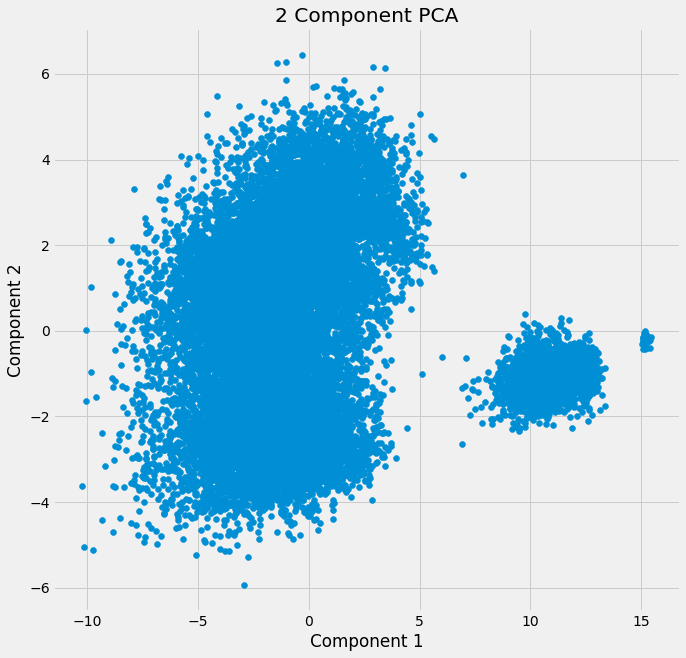

In [26]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) #c = y_kmeans, s=10)

# 2D KMEANS

KMeans clustering was the clustering algorithm chosen to be applied. However, this exact data could be clustered using Hierarchical by any means.

In [27]:
# Implementing the K Means Clustering Algorithm and specifying the number of clusters needed.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

In [28]:
# Adding the two principal component features along with the cluster feature ot the dataframe.
df2['principal component 1'] = principal_component1
df2['principal component 2'] = principal_component2
df2['cluster1'] = y_kmeans

In [29]:
df2.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,principal component 1,principal component 2,cluster1
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,-10.157020,-5.044992,60
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,-10.234022,-3.625690,60
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,-9.712321,-5.123475,60
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,7.190151,-1.566234,35
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,-10.065232,-1.644211,49


In [30]:
from matplotlib import colors as mcolors

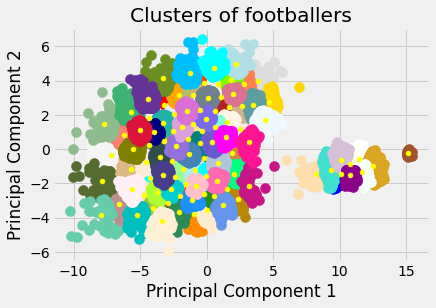

In [31]:
# Plotting the clusters.
# plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'Cluster 9')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'Cluster 10')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro', label = 'Cluster 11')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white', label = 'Cluster 12')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke', label = 'Cluster 13')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown', label = 'Cluster 14')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred', label = 'Cluster 15')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick', label = 'Cluster 16')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red', label = 'Cluster 17')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose', label = 'Cluster 18')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon', label = 'Cluster 19')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon', label = 'Cluster 20')
plt.scatter(principalComponents1[y_kmeans == 20, 0], principalComponents1[y_kmeans == 20, 1], s = 100, c = 'coral', label = 'Cluster 21')
plt.scatter(principalComponents1[y_kmeans == 21, 0], principalComponents1[y_kmeans == 21, 1], s = 100, c = 'orangered', label = 'Cluster 22')
plt.scatter(principalComponents1[y_kmeans == 22, 0], principalComponents1[y_kmeans == 22, 1], s = 100, c = 'sienna', label = 'Cluster 23')
plt.scatter(principalComponents1[y_kmeans == 23, 0], principalComponents1[y_kmeans == 23, 1], s = 100, c = 'seashell', label = 'Cluster 24')
plt.scatter(principalComponents1[y_kmeans == 24, 0], principalComponents1[y_kmeans == 24, 1], s = 100, c = 'chocolate', label = 'Cluster 25')
plt.scatter(principalComponents1[y_kmeans == 25, 0], principalComponents1[y_kmeans == 25, 1], s = 100, c = 'saddlebrown', label = 'Cluster 26')
plt.scatter(principalComponents1[y_kmeans == 26, 0], principalComponents1[y_kmeans == 26, 1], s = 100, c = 'sandybrown', label = 'Cluster 27')
plt.scatter(principalComponents1[y_kmeans == 27, 0], principalComponents1[y_kmeans == 27, 1], s = 100, c = 'peachpuff', label = 'Cluster 28')
plt.scatter(principalComponents1[y_kmeans == 28, 0], principalComponents1[y_kmeans == 28, 1], s = 100, c = 'peru', label = 'Cluster 29')
plt.scatter(principalComponents1[y_kmeans == 29, 0], principalComponents1[y_kmeans == 29, 1], s = 100, c = 'bisque', label = 'Cluster 30')
plt.scatter(principalComponents1[y_kmeans == 30, 0], principalComponents1[y_kmeans == 30, 1], s = 100, c = 'linen', label = 'Cluster 31')
plt.scatter(principalComponents1[y_kmeans == 31, 0], principalComponents1[y_kmeans == 31, 1], s = 100, c = 'darkorange', label = 'Cluster 32')
plt.scatter(principalComponents1[y_kmeans == 32, 0], principalComponents1[y_kmeans == 32, 1], s = 100, c = 'burlywood', label = 'Cluster 33')
plt.scatter(principalComponents1[y_kmeans == 33, 0], principalComponents1[y_kmeans == 33, 1], s = 100, c = 'antiquewhite', label = 'Cluster 34')
plt.scatter(principalComponents1[y_kmeans == 34, 0], principalComponents1[y_kmeans == 34, 1], s = 100, c = 'tan', label = 'Cluster 35')
plt.scatter(principalComponents1[y_kmeans == 35, 0], principalComponents1[y_kmeans == 35, 1], s = 100, c = 'navajowhite', label = 'Cluster 36')
plt.scatter(principalComponents1[y_kmeans == 36, 0], principalComponents1[y_kmeans == 36, 1], s = 100, c = 'orange', label = 'Cluster 37')
plt.scatter(principalComponents1[y_kmeans == 37, 0], principalComponents1[y_kmeans == 37, 1], s = 100, c = 'oldlace', label = 'Cluster 38')
plt.scatter(principalComponents1[y_kmeans == 38, 0], principalComponents1[y_kmeans == 38, 1], s = 100, c = 'darkgoldenrod', label = 'Cluster 39')
plt.scatter(principalComponents1[y_kmeans == 39, 0], principalComponents1[y_kmeans == 39, 1], s = 100, c = 'goldenrod', label = 'Cluster 40')
plt.scatter(principalComponents1[y_kmeans == 40, 0], principalComponents1[y_kmeans == 40, 1], s = 100, c = 'gold', label = 'Cluster 41')
plt.scatter(principalComponents1[y_kmeans == 41, 0], principalComponents1[y_kmeans == 41, 1], s = 100, c = 'khaki', label = 'Cluster 42')
plt.scatter(principalComponents1[y_kmeans == 42, 0], principalComponents1[y_kmeans == 42, 1], s = 100, c = 'darkkhaki', label = 'Cluster 43')
plt.scatter(principalComponents1[y_kmeans == 43, 0], principalComponents1[y_kmeans == 43, 1], s = 100, c = 'ivory', label = 'Cluster 44')
plt.scatter(principalComponents1[y_kmeans == 44, 0], principalComponents1[y_kmeans == 44, 1], s = 100, c = 'beige', label = 'Cluster 45')
plt.scatter(principalComponents1[y_kmeans == 45, 0], principalComponents1[y_kmeans == 45, 1], s = 100, c = 'olive', label = 'Cluster 46')
plt.scatter(principalComponents1[y_kmeans == 46, 0], principalComponents1[y_kmeans == 46, 1], s = 100, c = 'y', label = 'Cluster 47')
plt.scatter(principalComponents1[y_kmeans == 47, 0], principalComponents1[y_kmeans == 47, 1], s = 100, c = 'olivedrab', label = 'Cluster 48')
plt.scatter(principalComponents1[y_kmeans == 48, 0], principalComponents1[y_kmeans == 48, 1], s = 100, c = 'yellowgreen', label = 'Cluster 49')
plt.scatter(principalComponents1[y_kmeans == 49, 0], principalComponents1[y_kmeans == 49, 1], s = 100, c = 'darkolivegreen', label = 'Cluster 50')
plt.scatter(principalComponents1[y_kmeans == 50, 0], principalComponents1[y_kmeans == 50, 1], s = 100, c = 'greenyellow', label = 'Cluster 51')
plt.scatter(principalComponents1[y_kmeans == 51, 0], principalComponents1[y_kmeans == 51, 1], s = 100, c = 'chartreuse', label = 'Cluster 52')
plt.scatter(principalComponents1[y_kmeans == 52, 0], principalComponents1[y_kmeans == 52, 1], s = 100, c = 'blanchedalmond', label = 'Cluster 53')
plt.scatter(principalComponents1[y_kmeans == 53, 0], principalComponents1[y_kmeans == 53, 1], s = 100, c = 'darkseagreen', label = 'Cluster 54')
plt.scatter(principalComponents1[y_kmeans == 54, 0], principalComponents1[y_kmeans == 54, 1], s = 100, c = 'palegreen', label = 'Cluster 55')
plt.scatter(principalComponents1[y_kmeans == 55, 0], principalComponents1[y_kmeans == 55, 1], s = 100, c = 'forestgreen', label = 'Cluster 56')
plt.scatter(principalComponents1[y_kmeans == 56, 0], principalComponents1[y_kmeans == 56, 1], s = 100, c = 'seagreen', label = 'Cluster 57')
plt.scatter(principalComponents1[y_kmeans == 57, 0], principalComponents1[y_kmeans == 57, 1], s = 100, c = 'mediumseagreen', label = 'Cluster 58')
plt.scatter(principalComponents1[y_kmeans == 58, 0], principalComponents1[y_kmeans == 58, 1], s = 100, c = 'springgreen', label = 'Cluster 59')
plt.scatter(principalComponents1[y_kmeans == 59, 0], principalComponents1[y_kmeans == 59, 1], s = 100, c = 'mintcream', label = 'Cluster 60')
plt.scatter(principalComponents1[y_kmeans == 60, 0], principalComponents1[y_kmeans == 60, 1], s = 100, c = 'mediumaquamarine', label = 'Cluster 61')
plt.scatter(principalComponents1[y_kmeans == 61, 0], principalComponents1[y_kmeans == 61, 1], s = 100, c = 'aquamarine', label = 'Cluster 62')
plt.scatter(principalComponents1[y_kmeans == 62, 0], principalComponents1[y_kmeans == 62, 1], s = 100, c = 'turquoise', label = 'Cluster 63')
plt.scatter(principalComponents1[y_kmeans == 63, 0], principalComponents1[y_kmeans == 63, 1], s = 100, c = 'lightseagreen', label = 'Cluster 64')
plt.scatter(principalComponents1[y_kmeans == 64, 0], principalComponents1[y_kmeans == 64, 1], s = 100, c = 'azure', label = 'Cluster 65')
plt.scatter(principalComponents1[y_kmeans == 65, 0], principalComponents1[y_kmeans == 65, 1], s = 100, c = 'paleturquoise', label = 'Cluster 66')
plt.scatter(principalComponents1[y_kmeans == 66, 0], principalComponents1[y_kmeans == 66, 1], s = 100, c = 'darkslategray', label = 'Cluster 67')
plt.scatter(principalComponents1[y_kmeans == 67, 0], principalComponents1[y_kmeans == 67, 1], s = 100, c = 'teal', label = 'Cluster 68')
plt.scatter(principalComponents1[y_kmeans == 68, 0], principalComponents1[y_kmeans == 68, 1], s = 100, c = 'c', label = 'Cluster 69')
plt.scatter(principalComponents1[y_kmeans == 69, 0], principalComponents1[y_kmeans == 69, 1], s = 100, c = 'cyan', label = 'Cluster 70')
plt.scatter(principalComponents1[y_kmeans == 70, 0], principalComponents1[y_kmeans == 70, 1], s = 100, c = 'darkturquoise', label = 'Cluster 71')
plt.scatter(principalComponents1[y_kmeans == 71, 0], principalComponents1[y_kmeans == 71, 1], s = 100, c = 'cadetblue', label = 'Cluster 72')
plt.scatter(principalComponents1[y_kmeans == 72, 0], principalComponents1[y_kmeans == 72, 1], s = 100, c = 'powderblue', label = 'Cluster 73')
plt.scatter(principalComponents1[y_kmeans == 73, 0], principalComponents1[y_kmeans == 73, 1], s = 100, c = 'deepskyblue', label = 'Cluster 74')
plt.scatter(principalComponents1[y_kmeans == 74, 0], principalComponents1[y_kmeans == 74, 1], s = 100, c = 'steelblue', label = 'Cluster 75')
plt.scatter(principalComponents1[y_kmeans == 75, 0], principalComponents1[y_kmeans == 75, 1], s = 100, c = 'aliceblue', label = 'Cluster 76')
plt.scatter(principalComponents1[y_kmeans == 76, 0], principalComponents1[y_kmeans == 76, 1], s = 100, c = 'dodgerblue', label = 'Cluster 77')
plt.scatter(principalComponents1[y_kmeans == 77, 0], principalComponents1[y_kmeans == 77, 1], s = 100, c = 'slategrey', label = 'Cluster 78')
plt.scatter(principalComponents1[y_kmeans == 78, 0], principalComponents1[y_kmeans == 78, 1], s = 100, c = 'lightsteelblue', label = 'Cluster 79')
plt.scatter(principalComponents1[y_kmeans == 79, 0], principalComponents1[y_kmeans == 79, 1], s = 100, c = 'cornflowerblue', label = 'Cluster 80')
plt.scatter(principalComponents1[y_kmeans == 80, 0], principalComponents1[y_kmeans == 80, 1], s = 100, c = 'navy', label = 'Cluster 81')
plt.scatter(principalComponents1[y_kmeans == 81, 0], principalComponents1[y_kmeans == 81, 1], s = 100, c = 'slateblue', label = 'Cluster 82')
plt.scatter(principalComponents1[y_kmeans == 82, 0], principalComponents1[y_kmeans == 82, 1], s = 100, c = 'darkslateblue', label = 'Cluster 83')
plt.scatter(principalComponents1[y_kmeans == 83, 0], principalComponents1[y_kmeans == 83, 1], s = 100, c = 'mediumslateblue', label = 'Cluster 84')
plt.scatter(principalComponents1[y_kmeans == 84, 0], principalComponents1[y_kmeans == 84, 1], s = 100, c = 'mediumpurple', label = 'Cluster 85')
plt.scatter(principalComponents1[y_kmeans == 85, 0], principalComponents1[y_kmeans == 85, 1], s = 100, c = 'rebeccapurple', label = 'Cluster 86')
plt.scatter(principalComponents1[y_kmeans == 86, 0], principalComponents1[y_kmeans == 86, 1], s = 100, c = 'thistle', label = 'Cluster 87')
plt.scatter(principalComponents1[y_kmeans == 87, 0], principalComponents1[y_kmeans == 87, 1], s = 100, c = 'plum', label = 'Cluster 88')
plt.scatter(principalComponents1[y_kmeans == 88, 0], principalComponents1[y_kmeans == 88, 1], s = 100, c = 'darkmagenta', label = 'Cluster 89')
plt.scatter(principalComponents1[y_kmeans == 89, 0], principalComponents1[y_kmeans == 89, 1], s = 100, c = 'magenta', label = 'Cluster 90')
plt.scatter(principalComponents1[y_kmeans == 90, 0], principalComponents1[y_kmeans == 90, 1], s = 100, c = 'orchid', label = 'Cluster 91')
plt.scatter(principalComponents1[y_kmeans == 91, 0], principalComponents1[y_kmeans == 91, 1], s = 100, c = 'mediumvioletred', label = 'Cluster 92')
plt.scatter(principalComponents1[y_kmeans == 92, 0], principalComponents1[y_kmeans == 92, 1], s = 100, c = 'deeppink', label = 'Cluster 93')
plt.scatter(principalComponents1[y_kmeans == 93, 0], principalComponents1[y_kmeans == 93, 1], s = 100, c = 'hotpink', label = 'Cluster 94')
plt.scatter(principalComponents1[y_kmeans == 94, 0], principalComponents1[y_kmeans == 94, 1], s = 100, c = 'lavenderblush', label = 'Cluster 95')
plt.scatter(principalComponents1[y_kmeans == 95, 0], principalComponents1[y_kmeans == 95, 1], s = 100, c = 'pink', label = 'Cluster 96')
plt.scatter(principalComponents1[y_kmeans == 96, 0], principalComponents1[y_kmeans == 96, 1], s = 100, c = 'crimson', label = 'Cluster 97')
plt.scatter(principalComponents1[y_kmeans == 97, 0], principalComponents1[y_kmeans == 97, 1], s = 100, c = 'palevioletred', label = 'Cluster 98')
plt.scatter(principalComponents1[y_kmeans == 98, 0], principalComponents1[y_kmeans == 98, 1], s = 100, c = 'papayawhip', label = 'Cluster 99')
plt.scatter(principalComponents1[y_kmeans == 99, 0], principalComponents1[y_kmeans == 99, 1], s = 100, c = 'aqua', label = 'Cluster 100')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of footballers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()

# 3D PCA

In addition to the aforementioned 2D PCA, 3D PCA was also implemented to check for differences between the two dimensions.

In [32]:
# Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents2 = pca.fit_transform(X)

In [33]:
# Viewing the array of features. They were reduced from 42 to 3 using the Principal Component Analysis from above.
principalComponents2

array([[-10.15701968,  -5.04499229,   7.86724308],
       [-10.23402228,  -3.62568989,   8.47133393],
       [ -9.71232125,  -5.12347458,   7.16779991],
       ...,
       [  3.56473582,  -2.79255575,  -4.4399728 ],
       [  3.45707421,  -2.71535209,  -4.90903503],
       [  2.96616371,   0.33659026,  -3.39631753]])

In [34]:
# Creating a dataframe featuring the three Principal components that we acquired through PCA.
PCA_dataset2 = pd.DataFrame(data = principalComponents2, columns = ['component3', 'component4', 'component5'] )
PCA_dataset2.head()

,component3,component4,component5
0,-10.157020,-5.044992,7.867243
1,-10.234022,-3.625690,8.471334
2,-9.712321,-5.123475,7.167800
3,7.190151,-1.566234,11.097623
4,-10.065232,-1.644211,7.055799


In [35]:
# Extracting the three features from above in order to add them to the dataframe.
principal_component3 = PCA_dataset2['component3']
principal_component4 = PCA_dataset2['component4']
principal_component5 = PCA_dataset2['component5']

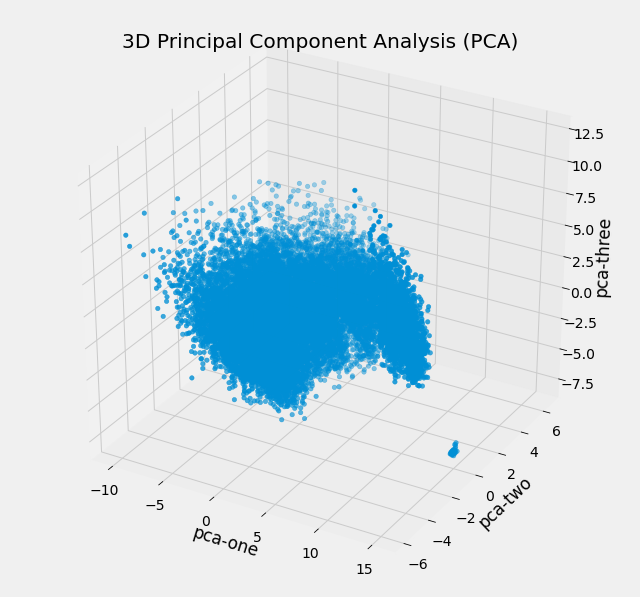

In [36]:
# Plotting the effects of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
    #c = x_kmeans
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# 3D KMEANS

Since 3D PCA was utilized 3D Kmeans was also used to visualize the clusters in 3 dimensions.

In [37]:
# Implementing the K Means Clustering Algorithm and specifying the number of clusters needed.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 1)
x_kmeans = kmeans.fit_predict(principalComponents2)

In [38]:
# Adding the three principal component features along with the cluster feature of the dataframe.
df2['principal component 3'] = principal_component3
df2['principal component 4'] = principal_component4
df2['principal component 5'] = principal_component5
df2['cluster2'] = x_kmeans

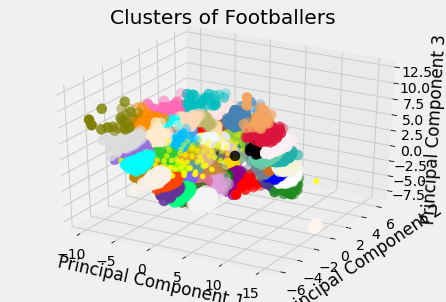

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=Axes3D(fig)
# Plotting the clusters.
ax.scatter(principalComponents2[x_kmeans == 0, 0], principalComponents2[x_kmeans == 0, 1], principalComponents2[x_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(principalComponents2[x_kmeans == 1, 0], principalComponents2[x_kmeans == 1, 1], principalComponents2[x_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(principalComponents2[x_kmeans == 2, 0], principalComponents2[x_kmeans == 2, 1], principalComponents2[x_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(principalComponents2[x_kmeans == 3, 0], principalComponents2[x_kmeans == 3, 1], principalComponents2[x_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(principalComponents2[x_kmeans == 4, 0], principalComponents2[x_kmeans == 4, 1], principalComponents2[x_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
ax.scatter(principalComponents2[x_kmeans == 5, 0], principalComponents2[x_kmeans == 5, 1], principalComponents2[x_kmeans == 5, 2], s = 100, c = 'limegreen', label = 'Cluster 6')
ax.scatter(principalComponents2[x_kmeans == 6, 0], principalComponents2[x_kmeans == 6, 1], principalComponents2[x_kmeans == 6, 2], s = 100, c = 'lavender', label = 'Cluster 7')
ax.scatter(principalComponents2[x_kmeans == 7, 0], principalComponents2[x_kmeans == 7, 1], principalComponents2[x_kmeans == 7, 2], s = 100, c = 'black', label = 'Cluster 8')
ax.scatter(principalComponents2[x_kmeans == 8, 0], principalComponents2[x_kmeans == 8, 1], principalComponents2[x_kmeans == 8, 2], s = 100, c = 'dimgray', label = 'Cluster 9')
ax.scatter(principalComponents2[x_kmeans == 9, 0], principalComponents2[x_kmeans == 9, 1], principalComponents2[x_kmeans == 9, 2], s = 100, c = 'silver', label = 'Cluster 10')
ax.scatter(principalComponents2[x_kmeans == 10, 0], principalComponents2[x_kmeans == 10, 1], principalComponents2[x_kmeans == 10, 2], s = 100, c = 'gainsboro', label = 'Cluster 11')
ax.scatter(principalComponents2[x_kmeans == 11, 0], principalComponents2[x_kmeans == 11, 1], principalComponents2[x_kmeans == 11, 2], s = 100, c = 'white', label = 'Cluster 12')
ax.scatter(principalComponents2[x_kmeans == 12, 0], principalComponents2[x_kmeans == 12, 1], principalComponents2[x_kmeans == 12, 2], s = 100, c = 'whitesmoke', label = 'Cluster 13')
ax.scatter(principalComponents2[x_kmeans == 13, 0], principalComponents2[x_kmeans == 13, 1], principalComponents2[x_kmeans == 13, 2], s = 100, c = 'rosybrown', label = 'Cluster 14')
ax.scatter(principalComponents2[x_kmeans == 14, 0], principalComponents2[x_kmeans == 14, 1], principalComponents2[x_kmeans == 14, 2], s = 100, c = 'indianred', label = 'Cluster 15')
ax.scatter(principalComponents2[x_kmeans == 15, 0], principalComponents2[x_kmeans == 15, 1], principalComponents2[x_kmeans == 15, 2], s = 100, c = 'firebrick', label = 'Cluster 16')
ax.scatter(principalComponents2[x_kmeans == 16, 0], principalComponents2[x_kmeans == 16, 1], principalComponents2[x_kmeans == 16, 2], s = 100, c = 'red', label = 'Cluster 17')
ax.scatter(principalComponents2[x_kmeans == 17, 0], principalComponents2[x_kmeans == 17, 1], principalComponents2[x_kmeans == 17, 2], s = 100, c = 'mistyrose', label = 'Cluster 18')
ax.scatter(principalComponents2[x_kmeans == 18, 0], principalComponents2[x_kmeans == 18, 1], principalComponents2[x_kmeans == 18, 2], s = 100, c = 'salmon', label = 'Cluster 19')
ax.scatter(principalComponents2[x_kmeans == 19, 0], principalComponents2[x_kmeans == 19, 1], principalComponents2[x_kmeans == 19, 2], s = 100, c = 'darksalmon', label = 'Cluster 20')
ax.scatter(principalComponents2[x_kmeans == 20, 0], principalComponents2[x_kmeans == 20, 1], principalComponents2[x_kmeans == 20, 2], s = 100, c = 'coral', label = 'Cluster 21')
ax.scatter(principalComponents2[x_kmeans == 21, 0], principalComponents2[x_kmeans == 21, 1], principalComponents2[x_kmeans == 21, 2], s = 100, c = 'orangered', label = 'Cluster 22')
ax.scatter(principalComponents2[x_kmeans == 22, 0], principalComponents2[x_kmeans == 22, 1], principalComponents2[x_kmeans == 22, 2], s = 100, c = 'sienna', label = 'Cluster 23')
ax.scatter(principalComponents2[x_kmeans == 23, 0], principalComponents2[x_kmeans == 23, 1], principalComponents2[x_kmeans == 23, 2], s = 100, c = 'seashell', label = 'Cluster 24')
ax.scatter(principalComponents2[x_kmeans == 24, 0], principalComponents2[x_kmeans == 24, 1], principalComponents2[x_kmeans == 24, 2], s = 100, c = 'chocolate', label = 'Cluster 25')
ax.scatter(principalComponents2[x_kmeans == 25, 0], principalComponents2[x_kmeans == 25, 1], principalComponents2[x_kmeans == 25, 2], s = 100, c = 'saddlebrown', label = 'Cluster 26')
ax.scatter(principalComponents2[x_kmeans == 26, 0], principalComponents2[x_kmeans == 26, 1], principalComponents2[x_kmeans == 26, 2], s = 100, c = 'sandybrown', label = 'Cluster 27')
ax.scatter(principalComponents2[x_kmeans == 27, 0], principalComponents2[x_kmeans == 27, 1], principalComponents2[x_kmeans == 27, 2], s = 100, c = 'peachpuff', label = 'Cluster 28')
ax.scatter(principalComponents2[x_kmeans == 28, 0], principalComponents2[x_kmeans == 28, 1], principalComponents2[x_kmeans == 28, 2], s = 100, c = 'peru', label = 'Cluster 29')
ax.scatter(principalComponents2[x_kmeans == 29, 0], principalComponents2[x_kmeans == 29, 1], principalComponents2[x_kmeans == 29, 2], s = 100, c = 'bisque', label = 'Cluster 30')
ax.scatter(principalComponents2[x_kmeans == 30, 0], principalComponents2[x_kmeans == 30, 1], principalComponents2[x_kmeans == 30, 2], s = 100, c = 'linen', label = 'Cluster 31')
ax.scatter(principalComponents2[x_kmeans == 31, 0], principalComponents2[x_kmeans == 31, 1], principalComponents2[x_kmeans == 31, 2], s = 100, c = 'darkorange', label = 'Cluster 32')
ax.scatter(principalComponents2[x_kmeans == 32, 0], principalComponents2[x_kmeans == 32, 1], principalComponents2[x_kmeans == 32, 2], s = 100, c = 'burlywood', label = 'Cluster 33')
ax.scatter(principalComponents2[x_kmeans == 33, 0], principalComponents2[x_kmeans == 33, 1], principalComponents2[x_kmeans == 33, 2], s = 100, c = 'antiquewhite', label = 'Cluster 34')
ax.scatter(principalComponents2[x_kmeans == 34, 0], principalComponents2[x_kmeans == 34, 1], principalComponents2[x_kmeans == 34, 2], s = 100, c = 'tan', label = 'Cluster 35')
ax.scatter(principalComponents2[x_kmeans == 35, 0], principalComponents2[x_kmeans == 35, 1], principalComponents2[x_kmeans == 35, 2], s = 100, c = 'navajowhite', label = 'Cluster 36')
ax.scatter(principalComponents2[x_kmeans == 36, 0], principalComponents2[x_kmeans == 36, 1], principalComponents2[x_kmeans == 36, 2], s = 100, c = 'orange', label = 'Cluster 37')
ax.scatter(principalComponents2[x_kmeans == 37, 0], principalComponents2[x_kmeans == 37, 1], principalComponents2[x_kmeans == 37, 2], s = 100, c = 'oldlace', label = 'Cluster 38')
ax.scatter(principalComponents2[x_kmeans == 38, 0], principalComponents2[x_kmeans == 38, 1], principalComponents2[x_kmeans == 38, 2], s = 100, c = 'darkgoldenrod', label = 'Cluster 39')
ax.scatter(principalComponents2[x_kmeans == 39, 0], principalComponents2[x_kmeans == 39, 1], principalComponents2[x_kmeans == 39, 2], s = 100, c = 'goldenrod', label = 'Cluster 40')
ax.scatter(principalComponents2[x_kmeans == 40, 0], principalComponents2[x_kmeans == 40, 1], principalComponents2[x_kmeans == 40, 2], s = 100, c = 'gold', label = 'Cluster 41')
ax.scatter(principalComponents2[x_kmeans == 41, 0], principalComponents2[x_kmeans == 41, 1], principalComponents2[x_kmeans == 41, 2], s = 100, c = 'khaki', label = 'Cluster 42')
ax.scatter(principalComponents2[x_kmeans == 42, 0], principalComponents2[x_kmeans == 42, 1], principalComponents2[x_kmeans == 42, 2], s = 100, c = 'darkkhaki', label = 'Cluster 43')
ax.scatter(principalComponents2[x_kmeans == 43, 0], principalComponents2[x_kmeans == 43, 1], principalComponents2[x_kmeans == 43, 2], s = 100, c = 'ivory', label = 'Cluster 44')
ax.scatter(principalComponents2[x_kmeans == 44, 0], principalComponents2[x_kmeans == 44, 1], principalComponents2[x_kmeans == 44, 2], s = 100, c = 'beige', label = 'Cluster 45')
ax.scatter(principalComponents2[x_kmeans == 45, 0], principalComponents2[x_kmeans == 45, 1], principalComponents2[x_kmeans == 45, 2], s = 100, c = 'olive', label = 'Cluster 46')
ax.scatter(principalComponents2[x_kmeans == 46, 0], principalComponents2[x_kmeans == 46, 1], principalComponents2[x_kmeans == 46, 2], s = 100, c = 'y', label = 'Cluster 47')
ax.scatter(principalComponents2[x_kmeans == 47, 0], principalComponents2[x_kmeans == 47, 1], principalComponents2[x_kmeans == 47, 2], s = 100, c = 'olivedrab', label = 'Cluster 48')
ax.scatter(principalComponents2[x_kmeans == 48, 0], principalComponents2[x_kmeans == 48, 1], principalComponents2[x_kmeans == 48, 2], s = 100, c = 'yellowgreen', label = 'Cluster 49')
ax.scatter(principalComponents2[x_kmeans == 49, 0], principalComponents2[x_kmeans == 49, 1], principalComponents2[x_kmeans == 49, 2], s = 100, c = 'darkolivegreen', label = 'Cluster 50')
ax.scatter(principalComponents2[x_kmeans == 50, 0], principalComponents2[x_kmeans == 50, 1], principalComponents2[x_kmeans == 50, 2], s = 100, c = 'greenyellow', label = 'Cluster 51')
ax.scatter(principalComponents2[x_kmeans == 51, 0], principalComponents2[x_kmeans == 51, 1], principalComponents2[x_kmeans == 51, 2], s = 100, c = 'chartreuse', label = 'Cluster 52')
ax.scatter(principalComponents2[x_kmeans == 52, 0], principalComponents2[x_kmeans == 52, 1], principalComponents2[x_kmeans == 52, 2], s = 100, c = 'blanchedalmond', label = 'Cluster 53')
ax.scatter(principalComponents2[x_kmeans == 53, 0], principalComponents2[x_kmeans == 53, 1], principalComponents2[x_kmeans == 53, 2], s = 100, c = 'darkseagreen', label = 'Cluster 54')
ax.scatter(principalComponents2[x_kmeans == 54, 0], principalComponents2[x_kmeans == 54, 1], principalComponents2[x_kmeans == 54, 2], s = 100, c = 'palegreen', label = 'Cluster 55')
ax.scatter(principalComponents2[x_kmeans == 55, 0], principalComponents2[x_kmeans == 55, 1], principalComponents2[x_kmeans == 55, 2], s = 100, c = 'forestgreen', label = 'Cluster 56')
ax.scatter(principalComponents2[x_kmeans == 56, 0], principalComponents2[x_kmeans == 56, 1], principalComponents2[x_kmeans == 56, 2], s = 100, c = 'seagreen', label = 'Cluster 57')
ax.scatter(principalComponents2[x_kmeans == 57, 0], principalComponents2[x_kmeans == 57, 1], principalComponents2[x_kmeans == 57, 2], s = 100, c = 'mediumseagreen', label = 'Cluster 58')
ax.scatter(principalComponents2[x_kmeans == 58, 0], principalComponents2[x_kmeans == 58, 1], principalComponents2[x_kmeans == 58, 2], s = 100, c = 'springgreen', label = 'Cluster 59')
ax.scatter(principalComponents2[x_kmeans == 59, 0], principalComponents2[x_kmeans == 59, 1], principalComponents2[x_kmeans == 59, 2], s = 100, c = 'mintcream', label = 'Cluster 60')
ax.scatter(principalComponents2[x_kmeans == 60, 0], principalComponents2[x_kmeans == 60, 1], principalComponents2[x_kmeans == 60, 2], s = 100, c = 'mediumaquamarine', label = 'Cluster 61')
ax.scatter(principalComponents2[x_kmeans == 61, 0], principalComponents2[x_kmeans == 61, 1], principalComponents2[x_kmeans == 61, 2], s = 100, c = 'aquamarine', label = 'Cluster 62')
ax.scatter(principalComponents2[x_kmeans == 62, 0], principalComponents2[x_kmeans == 62, 1], principalComponents2[x_kmeans == 62, 2], s = 100, c = 'turquoise', label = 'Cluster 63')
ax.scatter(principalComponents2[x_kmeans == 63, 0], principalComponents2[x_kmeans == 63, 1], principalComponents2[x_kmeans == 63, 2], s = 100, c = 'lightseagreen', label = 'Cluster 64')
ax.scatter(principalComponents2[x_kmeans == 64, 0], principalComponents2[x_kmeans == 64, 1], principalComponents2[x_kmeans == 64, 2], s = 100, c = 'azure', label = 'Cluster 65')
ax.scatter(principalComponents2[x_kmeans == 65, 0], principalComponents2[x_kmeans == 65, 1], principalComponents2[x_kmeans == 65, 2], s = 100, c = 'paleturquoise', label = 'Cluster 66')
ax.scatter(principalComponents2[x_kmeans == 66, 0], principalComponents2[x_kmeans == 66, 1], principalComponents2[x_kmeans == 66, 2], s = 100, c = 'darkslategray', label = 'Cluster 67')
ax.scatter(principalComponents2[x_kmeans == 67, 0], principalComponents2[x_kmeans == 67, 1], principalComponents2[x_kmeans == 67, 2], s = 100, c = 'teal', label = 'Cluster 68')
ax.scatter(principalComponents2[x_kmeans == 68, 0], principalComponents2[x_kmeans == 68, 1], principalComponents2[x_kmeans == 68, 2], s = 100, c = 'c', label = 'Cluster 69')
ax.scatter(principalComponents2[x_kmeans == 69, 0], principalComponents2[x_kmeans == 69, 1], principalComponents2[x_kmeans == 69, 2], s = 100, c = 'cyan', label = 'Cluster 70')
ax.scatter(principalComponents2[x_kmeans == 70, 0], principalComponents2[x_kmeans == 70, 1], principalComponents2[x_kmeans == 70, 2], s = 100, c = 'darkturquoise', label = 'Cluster 71')
ax.scatter(principalComponents2[x_kmeans == 71, 0], principalComponents2[x_kmeans == 71, 1], principalComponents2[x_kmeans == 71, 2], s = 100, c = 'cadetblue', label = 'Cluster 72')
ax.scatter(principalComponents2[x_kmeans == 72, 0], principalComponents2[x_kmeans == 72, 1], principalComponents2[x_kmeans == 72, 2], s = 100, c = 'powderblue', label = 'Cluster 73')
ax.scatter(principalComponents2[x_kmeans == 73, 0], principalComponents2[x_kmeans == 73, 1], principalComponents2[x_kmeans == 73, 2], s = 100, c = 'deepskyblue', label = 'Cluster 74')
ax.scatter(principalComponents2[x_kmeans == 74, 0], principalComponents2[x_kmeans == 74, 1], principalComponents2[x_kmeans == 74, 2], s = 100, c = 'steelblue', label = 'Cluster 75')
ax.scatter(principalComponents2[x_kmeans == 75, 0], principalComponents2[x_kmeans == 75, 1], principalComponents2[x_kmeans == 75, 2], s = 100, c = 'aliceblue', label = 'Cluster 76')
ax.scatter(principalComponents2[x_kmeans == 76, 0], principalComponents2[x_kmeans == 76, 1], principalComponents2[x_kmeans == 76, 2], s = 100, c = 'dodgerblue', label = 'Cluster 77')
ax.scatter(principalComponents2[x_kmeans == 77, 0], principalComponents2[x_kmeans == 77, 1], principalComponents2[x_kmeans == 77, 2], s = 100, c = 'slategrey', label = 'Cluster 78')
ax.scatter(principalComponents2[x_kmeans == 78, 0], principalComponents2[x_kmeans == 78, 1], principalComponents2[x_kmeans == 78, 2], s = 100, c = 'lightsteelblue', label = 'Cluster 79')
ax.scatter(principalComponents2[x_kmeans == 79, 0], principalComponents2[x_kmeans == 79, 1], principalComponents2[x_kmeans == 79, 2], s = 100, c = 'cornflowerblue', label = 'Cluster 80')
ax.scatter(principalComponents2[x_kmeans == 80, 0], principalComponents2[x_kmeans == 80, 1], principalComponents2[x_kmeans == 80, 2], s = 100, c = 'navy', label = 'Cluster 81')
ax.scatter(principalComponents2[x_kmeans == 81, 0], principalComponents2[x_kmeans == 81, 1], principalComponents2[x_kmeans == 81, 2], s = 100, c = 'slateblue', label = 'Cluster 82')
ax.scatter(principalComponents2[x_kmeans == 82, 0], principalComponents2[x_kmeans == 82, 1], principalComponents2[x_kmeans == 82, 2], s = 100, c = 'darkslateblue', label = 'Cluster 83')
ax.scatter(principalComponents2[x_kmeans == 83, 0], principalComponents2[x_kmeans == 83, 1], principalComponents2[x_kmeans == 83, 2], s = 100, c = 'mediumslateblue', label = 'Cluster 84')
ax.scatter(principalComponents2[x_kmeans == 84, 0], principalComponents2[x_kmeans == 84, 1], principalComponents2[x_kmeans == 84, 2], s = 100, c = 'mediumpurple', label = 'Cluster 85')
ax.scatter(principalComponents2[x_kmeans == 85, 0], principalComponents2[x_kmeans == 85, 1], principalComponents2[x_kmeans == 85, 2], s = 100, c = 'rebeccapurple', label = 'Cluster 86')
ax.scatter(principalComponents2[x_kmeans == 86, 0], principalComponents2[x_kmeans == 86, 1], principalComponents2[x_kmeans == 86, 2], s = 100, c = 'thistle', label = 'Cluster 87')
ax.scatter(principalComponents2[x_kmeans == 87, 0], principalComponents2[x_kmeans == 87, 1], principalComponents2[x_kmeans == 87, 2], s = 100, c = 'plum', label = 'Cluster 88')
ax.scatter(principalComponents2[x_kmeans == 88, 0], principalComponents2[x_kmeans == 88, 1], principalComponents2[x_kmeans == 88, 2], s = 100, c = 'darkmagenta', label = 'Cluster 89')
ax.scatter(principalComponents2[x_kmeans == 89, 0], principalComponents2[x_kmeans == 89, 1], principalComponents2[x_kmeans == 89, 2], s = 100, c = 'magenta', label = 'Cluster 90')
ax.scatter(principalComponents2[x_kmeans == 90, 0], principalComponents2[x_kmeans == 90, 1], principalComponents2[x_kmeans == 90, 2], s = 100, c = 'orchid', label = 'Cluster 91')
ax.scatter(principalComponents2[x_kmeans == 91, 0], principalComponents2[x_kmeans == 91, 1], principalComponents2[x_kmeans == 91, 2], s = 100, c = 'mediumvioletred', label = 'Cluster 92')
ax.scatter(principalComponents2[x_kmeans == 92, 0], principalComponents2[x_kmeans == 92, 1], principalComponents2[x_kmeans == 92, 2], s = 100, c = 'deeppink', label = 'Cluster 93')
ax.scatter(principalComponents2[x_kmeans == 93, 0], principalComponents2[x_kmeans == 93, 1], principalComponents2[x_kmeans == 93, 2], s = 100, c = 'hotpink', label = 'Cluster 94')
ax.scatter(principalComponents2[x_kmeans == 94, 0], principalComponents2[x_kmeans == 94, 1], principalComponents2[x_kmeans == 94, 2], s = 100, c = 'lavenderblush', label = 'Cluster 95')
ax.scatter(principalComponents2[x_kmeans == 95, 0], principalComponents2[x_kmeans == 95, 1], principalComponents2[x_kmeans == 95, 2], s = 100, c = 'pink', label = 'Cluster 96')
ax.scatter(principalComponents2[x_kmeans == 96, 0], principalComponents2[x_kmeans == 96, 1], principalComponents2[x_kmeans == 96, 2], s = 100, c = 'crimson', label = 'Cluster 97')
ax.scatter(principalComponents2[x_kmeans == 97, 0], principalComponents2[x_kmeans == 97, 1], principalComponents2[x_kmeans == 97, 2], s = 100, c = 'palevioletred', label = 'Cluster 98')
ax.scatter(principalComponents2[x_kmeans == 98, 0], principalComponents2[x_kmeans == 98, 1], principalComponents2[x_kmeans == 98, 2], s = 100, c = 'papayawhip', label = 'Cluster 99')
ax.scatter(principalComponents2[x_kmeans == 99, 0], principalComponents2[x_kmeans == 99, 1], principalComponents2[x_kmeans == 99, 2], s = 100, c = 'aqua', label = 'Cluster 100')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
# plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Clusters of Footballers')
plt.show()

In [40]:
df2['Name'] = df['Name']

In [41]:
# This is just another way to visualize the 3D Kmeans.
import plotly.express as px
fig = px.scatter_3d(df2, x='principal component 3', y='principal component 4', z='principal component 5',
              color=x_kmeans, log_x=True, hover_name="Name", hover_data=["Overall"])
fig.show()